In [27]:
import pandas as pd
import numpy as np

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Time series
from statsmodels.tsa.seasonal import seasonal_decompose

# 1 Year

In [2]:
stock_data = pd.read_csv('../data/NFLX_1year.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-04,513.000000,517.979980,510.369995,517.349976,517.349976,2039400
1,2021-08-05,517.130005,525.409973,514.020020,524.890015,524.890015,2556700
2,2021-08-06,524.000000,526.840027,519.390015,520.549988,520.549988,1919800
3,2021-08-09,521.150024,522.669983,517.989990,519.969971,519.969971,1367800
4,2021-08-10,520.000000,520.789978,512.969971,515.840027,515.840027,1960500


In [3]:
# setting the index as the date
stock_data.set_index('Date', inplace=True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-04,513.000000,517.979980,510.369995,517.349976,517.349976,2039400
2021-08-05,517.130005,525.409973,514.020020,524.890015,524.890015,2556700
2021-08-06,524.000000,526.840027,519.390015,520.549988,520.549988,1919800
2021-08-09,521.150024,522.669983,517.989990,519.969971,519.969971,1367800
2021-08-10,520.000000,520.789978,512.969971,515.840027,515.840027,1960500


In [4]:
# Check description of features
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,429.020236,435.598023,421.527036,428.556046,428.556046,7.933552e+06
std,180.233812,181.027790,179.067182,179.819426,179.819426,1.103552e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,220.000000,226.270004,211.639999,218.509995,218.509995,3.077800e+06
50%,402.100006,409.359985,395.829987,403.529999,403.529999,5.035000e+06
75%,598.710022,609.450012,593.669983,599.059998,599.059998,8.522100e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [5]:
# We will focus on the closing price

closing_price = stock_data['Close']

<AxesSubplot:xlabel='Date', ylabel='Close'>

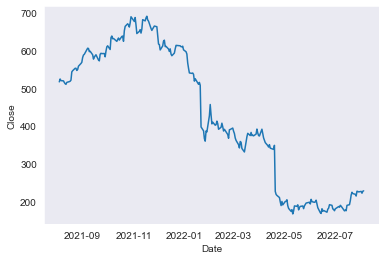

In [6]:
# We have some very unusual activity, due to the recent challenges faced by the company, it would be interesting to consider the news / social sentiment at that time.

sns.lineplot(data=closing_price)

<AxesSubplot:xlabel='Close', ylabel='Count'>

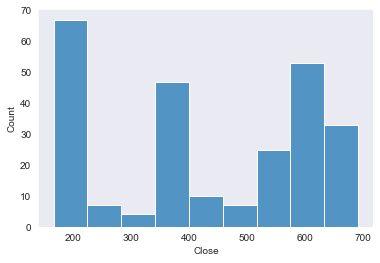

In [7]:
# Closing price is not gaussian
sns.histplot(data=closing_price)

<AxesSubplot:xlabel='Close', ylabel='Count'>

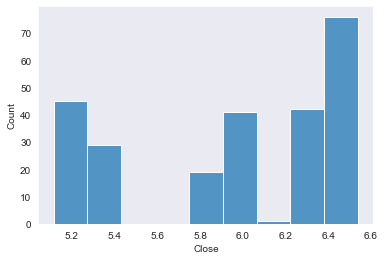

In [8]:
# Does log help?
closing_log = np.log(closing_price)
sns.histplot(data=closing_log)

<AxesSubplot:ylabel='Count'>

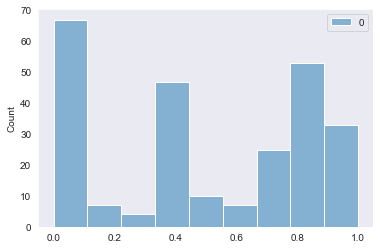

In [9]:
# nope, let's scale it. Nope, doesn't help
scaler = MinMaxScaler()
closing_minmax = scaler.fit_transform(closing_price.values.reshape(-1,1))
# scaler.inverse_transform(closing_minmax)
sns.histplot(closing_minmax)

# 5 Year

There's clearly things happening in the past year that we can't predict with the price alone.
Let's take a more normal trend as a baseline, and see if we can improve performance on
this abnormal data with more features later.

In [16]:
five_yr_stock = pd.read_csv('../data/NFLX_5year.csv')
five_yr_stock.set_index('Date', inplace=True)
five_yr_stock.index = pd.to_datetime(five_yr_stock.index)
five_yr_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,179.600006,181.000000,178.500000,180.270004,180.270004,4491100
2017-08-07,181.000000,182.270004,179.100006,181.330002,181.330002,4609800
2017-08-08,181.369995,181.910004,177.449997,178.360001,178.360001,6104000
2017-08-09,171.429993,175.960007,170.009995,175.779999,175.779999,9670500
2017-08-10,174.029999,174.449997,167.600006,169.139999,169.139999,9693100


In [17]:
# Check for null
five_yr_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-08-04 to 2022-08-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [18]:
five_yr_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,381.709595,387.534562,375.478013,381.666717,381.666717,7.881583e+06
std,127.377456,128.550928,125.920802,127.131821,127.131821,6.707878e+06
min,163.960007,168.669998,162.710007,165.949997,165.949997,1.144000e+06
25%,295.000000,299.045006,289.845001,294.207497,294.207497,4.328175e+06
50%,362.110001,367.364990,356.625000,361.865005,361.865005,6.114950e+06
75%,495.000000,502.992500,487.775002,494.557503,494.557503,9.408100e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


<AxesSubplot:xlabel='Date', ylabel='Close'>

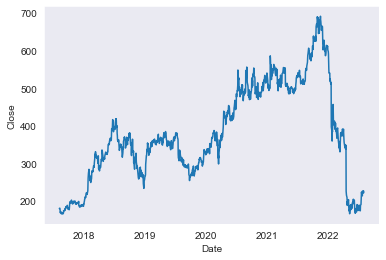

In [19]:
five_close = five_yr_stock['Close']
sns.lineplot(data=five_close)

In [22]:
type(five_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date', ylabel='Close'>

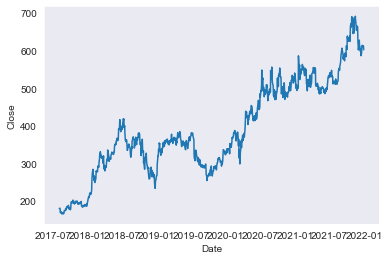

In [26]:
# We will start not considering 2022 data for our baseline
five_close = five_close.loc[:'2022-01-01']
sns.lineplot(data=five_close)

# Decomposition